This is a dataset of customer, and focuses on the customer retention process, like is customer dropping out the services, 
then what might be the reason and how could that be improved, 
this is classification data type and the target variable is churn column which says yes or no.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
cx=pd.read_csv('Customer_curn.csv')
cx.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
cx.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
cx.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
cx.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values we can covert the categorical data type into the numerical data type.

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cx['gender']=le.fit_transform(cx['gender'])
cx['Partner']=le.fit_transform(cx['Partner'])
cx['Dependents']=le.fit_transform(cx['Dependents'])
cx['PhoneService']=le.fit_transform(cx['PhoneService'])
cx['MultipleLines']=le.fit_transform(cx['MultipleLines'])
cx['InternetService']=le.fit_transform(cx['InternetService'])
cx['OnlineSecurity']=le.fit_transform(cx['OnlineSecurity'])
cx['OnlineBackup']=le.fit_transform(cx['OnlineBackup'])
cx['DeviceProtection']=le.fit_transform(cx['DeviceProtection'])
cx['TechSupport']=le.fit_transform(cx['TechSupport'])
cx['StreamingTV']=le.fit_transform(cx['StreamingTV'])
cx['StreamingMovies']=le.fit_transform(cx['StreamingMovies'])
cx['Contract']=le.fit_transform(cx['Contract'])
cx['PaperlessBilling']=le.fit_transform(cx['PaperlessBilling'])
cx['PaymentMethod']=le.fit_transform(cx['PaymentMethod'])
cx['TotalCharges']=le.fit_transform(cx['TotalCharges'])
cx['Churn']=le.fit_transform(cx['Churn'])

In [14]:
cx.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

customer ID is not required therefore dropping the column.

In [15]:
cs=cx.drop(['customerID'], axis=1)

In [16]:
cs

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


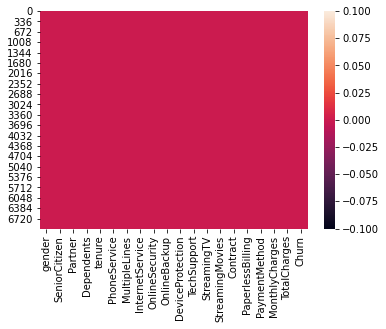

In [17]:
sns.heatmap(cs.isnull())

In [18]:
cs.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


In [19]:
cs.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


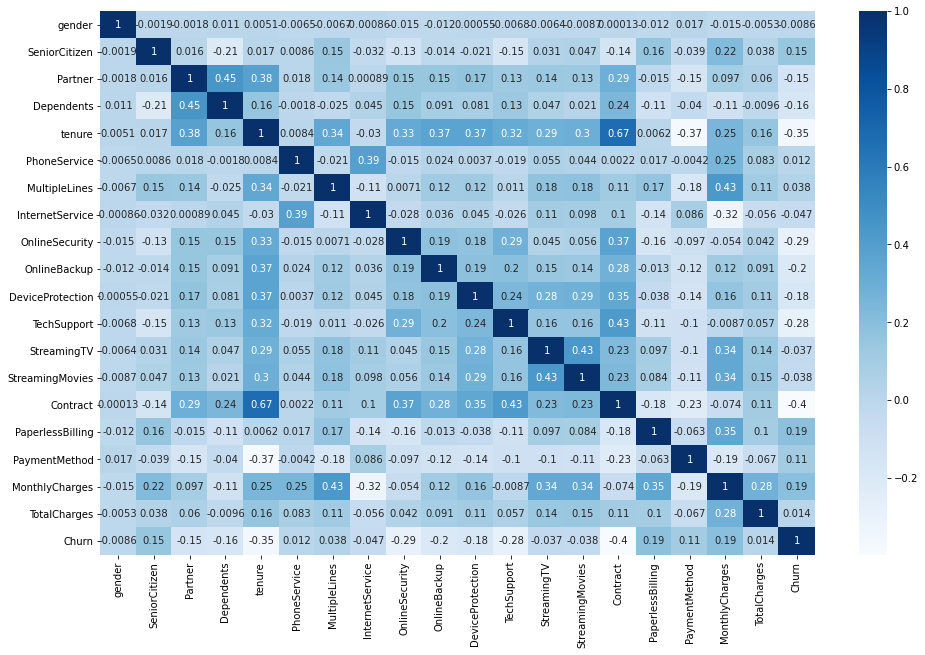

In [21]:
plt.figure(figsize=(16,10))
sns.heatmap(cs.corr(), annot=True, cmap='Blues')


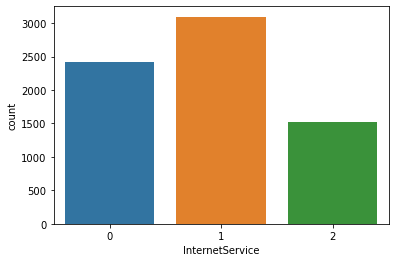

In [22]:
sns.countplot(x='InternetService', data=cs)

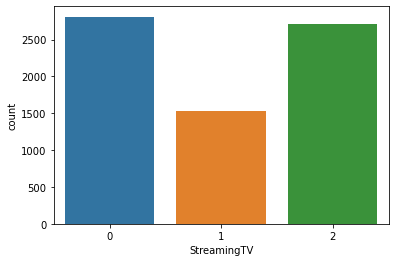

In [24]:
sns.countplot(x='StreamingTV', data=cs)

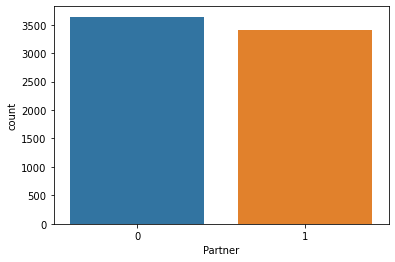

In [25]:
sns.countplot(x='Partner', data=cs)

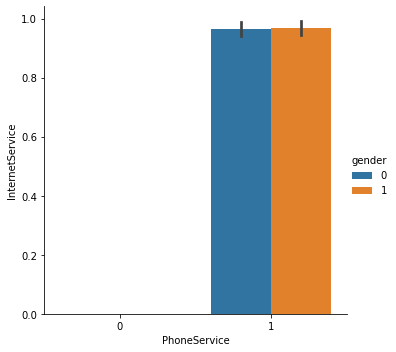

In [28]:
sns.catplot(x='PhoneService', y='InternetService', hue='gender',data=cs, kind='bar')

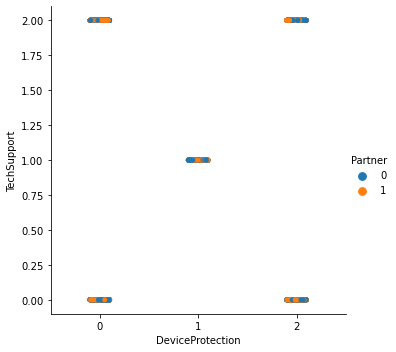

In [30]:
sns.catplot(x='DeviceProtection', y='TechSupport', hue='Partner',data=cs)

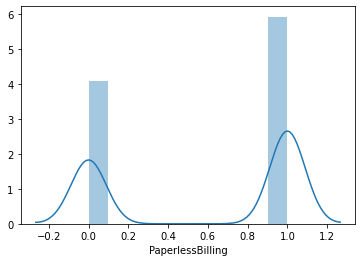

In [32]:
sns.distplot(cs['PaperlessBilling'])

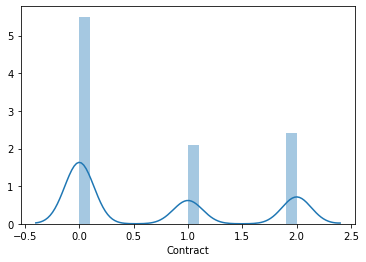

In [33]:
sns.distplot(cs['Contract'])

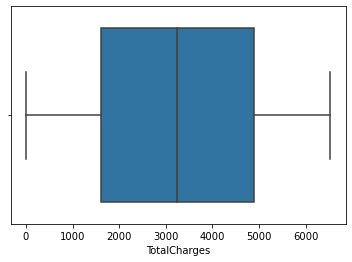

In [34]:
sns.boxplot(cs['TotalCharges'])

{'whiskers': [<matplotlib.lines.Line2D at 0xed5cc70>,
 'caps': [<matplotlib.lines.Line2D at 0xed6b370>,
 'boxes': [<matplotlib.lines.Line2D at 0xed5c910>],
 'medians': [<matplotlib.lines.Line2D at 0xed6ba30>],
 'fliers': [<matplotlib.lines.Line2D at 0xed6bd30>],
 'means': []}

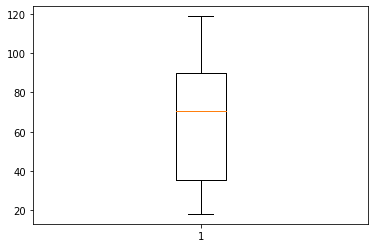

In [35]:
plt.boxplot(cs['MonthlyCharges'])

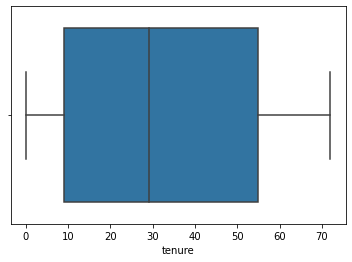

In [38]:
sns.boxplot(cs['tenure'])

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(cs))
ct=cs[(z<3).all(axis=1)]
ct

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,770,0
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


now after removing the outliers we need to look after the skewness and remove the skewness and the clean the data.

In [40]:
ct.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.041683
Churn               1.053055
dtype: float64

(array([621., 609., 706., 557., 581., 631., 670., 645., 703., 638.]),
 array([   0.,  653., 1306., 1959., 2612., 3265., 3918., 4571., 5224.,
        5877., 6530.]),
 <a list of 10 Patch objects>)

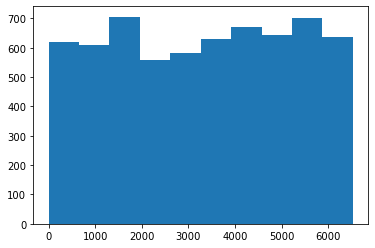

In [53]:
plt.hist(ct['TotalCharges'])

(array([4457.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1904.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

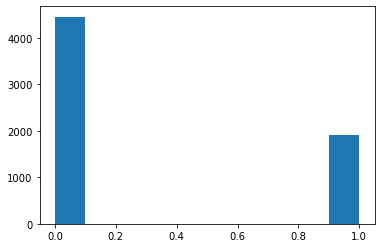

In [54]:
plt.hist(ct['Dependents'], bins=10)

In [57]:
x=ct.iloc[:,0:-1]
y=ct.iloc[:,-1]

In [59]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)

In [61]:
from sklearn.decomposition import PCA
pca=PCA(n_components=8)
x=pca.fit_transform(x)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
max_scr=0
for rstate in range(1,44):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rstate, test_size=0.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_scr:
        max_scr=acc_scr
        final_state=rstate
        
print('The corresponding random state',final_state,'to maximum accuracy score is', max_scr)

The corresponding random state 65 to maximum accuracy score is 0.800471327572663


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=65, test_size=0.20)
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Confusion matrix',confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score 0.800471327572663
Confusion matrix [[865  95]
 [159 154]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       960
           1       0.62      0.49      0.55       313

    accuracy                           0.80      1273
   macro avg       0.73      0.70      0.71      1273
weighted avg       0.79      0.80      0.79      1273



In [68]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [69]:
lg=LogisticRegression()
svc=SVC()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()

In [70]:
models=[]
models.append((lg,'LogisticRegression'))
models.append((svc,'svc'))
models.append((knn,'KNeighborsClassifier'))
models.append((dtc,'DecisionTreeClassifier'))
models.append((gnb,'GaussianNB'))

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

********** LogisticRegression *****************
Accuracy Score 0.800471327572663


Cross_val_score 0.7871419685435858


roc_auc_score 0.6965272231096911


              precision    recall  f1-score   support

           0       0.84      0.90      0.87       960
           1       0.62      0.49      0.55       313

    accuracy                           0.80      1273
   macro avg       0.73      0.70      0.71      1273
weighted avg       0.79      0.80      0.79      1273



Confusion_matrix [[865  95]
 [159 154]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


No handles with labels found to put in legend.




********** svc *****************
Accuracy Score 0.800471327572663


Cross_val_score 0.7893422390726974


roc_auc_score 0.678224840255591


              precision    recall  f1-score   support

           0       0.83      0.92      0.87       960
           1       0.64      0.44      0.52       313

    accuracy                           0.80      1273
   macro avg       0.74      0.68      0.70      1273
weighted avg       0.79      0.80      0.79      1273



Confusion_matrix [[882  78]
 [176 137]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


********** KNeighborsClassifier *****************
Accuracy Score 0.7588373919874313


Cross_val_score 0.7552281725462319


roc_auc_score 0.6603101703940363


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       960
           1       0.51      0.47      0.49       313

    accuracy                           0.76      1273
   macro avg       0.67      0.66      0.66      1273
weighted avg       0.75      0.76      0.76      1273



Confusion_matrix [[820 140]
 [167 146]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


********** DecisionTreeClassifier *****************
Accuracy Score 0.7360565593087196


Cross_val_score 0.7157684409032118


roc_auc_score 0.6430527822151224


              precision    recall  f1-score   support

           0       0.82      0.83      0.83       960
           1       0.46      0.46      0.46       313

    accuracy                           0.74      1273
   macro avg       0.64      0.64      0.64      1273
weighted avg       0.74      0.74      0.74      1273



Confusion_matrix [[793 167]
 [169 144]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


********** GaussianNB *****************
Accuracy Score 0.7918303220738413


Cross_val_score 0.7811688536082068


roc_auc_score 0.6918746671991479


              precision    recall  f1-score   support

           0       0.84      0.89      0.87       960
           1       0.59      0.50      0.54       313

    accuracy                           0.79      1273
   macro avg       0.72      0.69      0.70      1273
weighted avg       0.78      0.79      0.79      1273



Confusion_matrix [[853 107]
 [158 155]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)




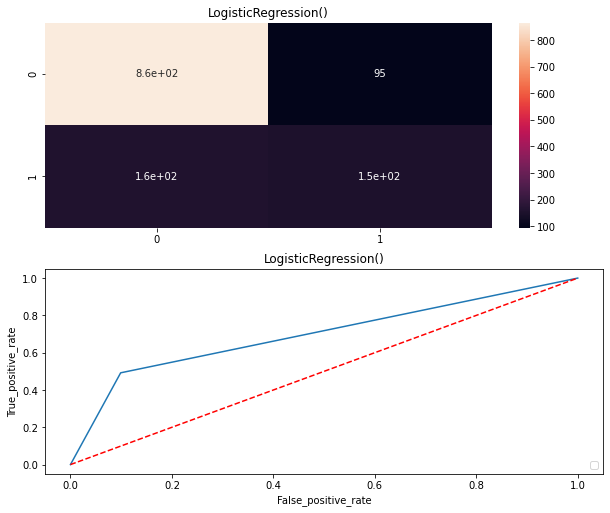

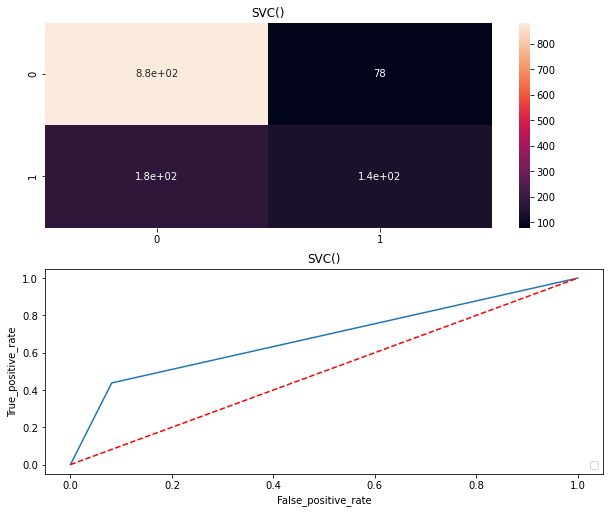

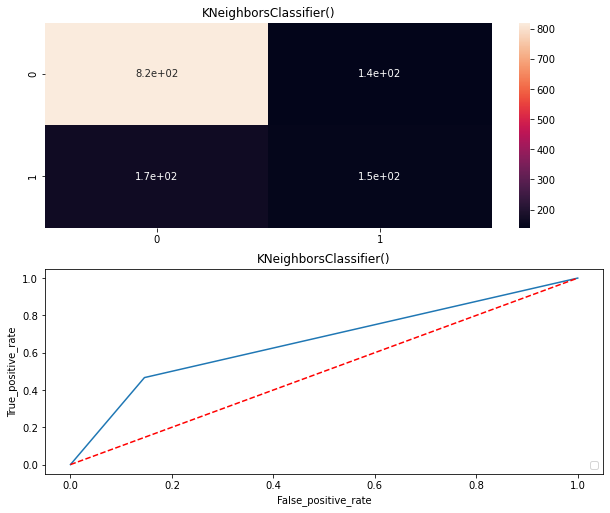

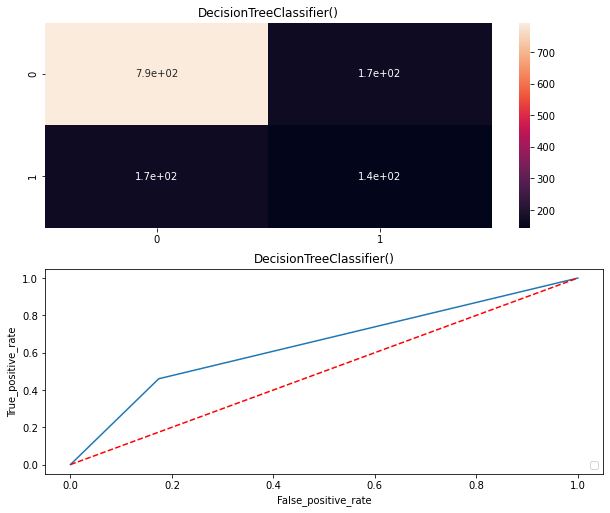

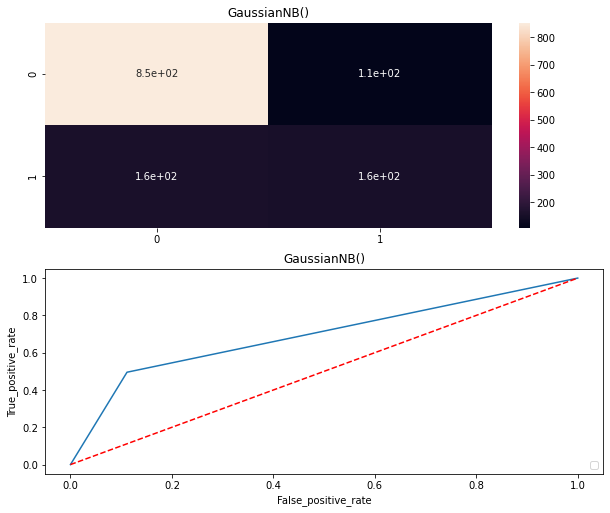

In [73]:
Model=[]
for m, model_name in models:
    print('**********',model_name,'*****************')
    m.fit(x_train,y_train)
    pred_y=m.predict(x_test)
    acc=accuracy_score(y_test,pred_y)
    print('Accuracy Score', acc)
    print('\n')
    csc=cross_val_score(m,x,y,cv=10, scoring='accuracy').mean()
    print('Cross_val_score', csc)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred_y)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    print('\n')
    print(classification_report(y_test,pred_y))
    print('\n')
    cms=confusion_matrix(y_test,pred_y)
    print('Confusion_matrix',cms)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(m)
    print(sns.heatmap(cms,annot=True))
    plt.subplot(912)
    plt.title(m)
    plt.plot(false_positive_rate,true_positive_rate)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n')
    

as we can see in the above score that logistic regression gives us the desired outputs.

In [74]:
df1=pd.DataFrame(y_pred)
df1.to_csv('lg_prediction.csv')

In [76]:
import joblib
joblib.dump(lg,'lg_customer_curn.pkl')

['lg_customer_curn.pkl']